# <center>Exploratory Data Analysis (EDA) </center>
References:
* https://www.datacamp.com/community/tutorials/exploratory-data-analysis-python
* Check good EDA notebooks published at Kaggle, e.g.
   * https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python

##  1. What is Exploratory Data Analysis (EDA)

- EDA is an approach to analyzing data sets to 
  * prepare data for modeling, e.g. 
    - dealing with missing values
    - feature engineering
    - correlation analysis etc
  * summarize their main characteristics, often with visual methods (i.e. **data profiling**)
  * generate hypotheses for subsequent modeling stage 

## 2. Example
- Data set: UCI Auto MPG datset (https://archive.ics.uci.edu/ml/datasets/Auto+MPG)
- Target:
  * Analyze variable correlation
  * Data profiling (visualization)

In [1]:
# Exercise 2.1. Load the data and library

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd

In [5]:
df = pd.read_csv('auto-mpg.csv', header=0)
df.head() #use the first row as the column name(head=0)
df.info()  # get detailed information of each column

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       406 non-null int64
displacement    406 non-null float64
horsepower      400 non-null float64
weight          406 non-null int64
acceleration    406 non-null float64
model_year      406 non-null int64
origin          406 non-null int64
car             406 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.6+ KB


## 3. Deal with Missing Values
- Find variables with missing values
- How to deal variables with missing values
  - drop samples (rows)
  - drop variables (columns)
  - interpolate

In [6]:
# Exercise 3.1. Create a simply If dataframe
# Missing values are shown as NaN (not a number)

import numpy as np

df1 = pd.DataFrame([[np.nan, 2, np.nan, 0], [3, 4, 6, 1],
                   [np.nan, np.nan, np.nan, 5], [5, 8, 2, 5]],
                   columns=list('ABCD'))
df1

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,6.0,1
2,NaN,NaN,NaN,5
3,5.0,8.0,2.0,5


In [8]:
# Exercise 3.2. Find missing values

# determine which value is null
df1.isnull()

# return any row which has at least one null value
df1.isnull().any(axis=1) # whether the row has missing values. True---->has missing values
df1[df1.isnull().any(axis=1)] # present the the row which has missing values.

# get number of null values in each column
df1.isnull().sum(axis=1)

,A,B,C,D
0,True,False,True,False
1,False,False,False,False
2,True,True,True,False
3,False,False,False,False


0     True
1    False
2     True
3    False
dtype: bool

,A,B,C,D
0,NaN,2.0,NaN,0
2,NaN,NaN,NaN,5


0    2
1    0
2    3
3    0
dtype: int64

In [11]:
# Exercise 3.3. drop missing values
df1
# to drop row which contains any NaN, use how='any'
df1.dropna(axis=1, how='any')   #aixs=1,drop the features, =0, drop the samples
df1.dropna(axis=0, how='any')  # has any missiong,drop
df1.dropna(axis=1, how='all')  # must the whole row is missing,drop
# drop the columns which has less than 3 non-null values
df1.dropna(axis=1, thresh=3)

df2=df1.dropna(axis=0, how='any')  

df2


,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,6.0,1
2,NaN,NaN,NaN,5
3,5.0,8.0,2.0,5


,D
0,0
1,1
2,5
3,5


,A,B,C,D
1,3.0,4.0,6.0,1
3,5.0,8.0,2.0,5


,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,6.0,1
2,NaN,NaN,NaN,5
3,5.0,8.0,2.0,5


,B,D
0,2.0,0
1,4.0,1
2,NaN,5
3,8.0,5


,A,B,C,D
1,3.0,4.0,6.0,1
3,5.0,8.0,2.0,5


In [12]:
# Exercise 3.4. interpolate missing values
df1
df1.interpolate(method='linear')# linear regression

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,6.0,1
2,NaN,NaN,NaN,5
3,5.0,8.0,2.0,5


,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,6.0,1
2,4.0,6.0,4.0,5
3,5.0,8.0,2.0,5


In [13]:
df.isnull().sum(axis=0)

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car             0
dtype: int64

In [14]:
# Exercise 3.5. # drop samples that have missing values

df=df.dropna(axis=0, how='any')  
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 405
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
model_year      392 non-null int64
origin          392 non-null int64
car             392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


## 4. Visualization

- Typical graphical techniques used in EDA:
  - Bar chart
  - Histogram
  - Line chart
  - Scatter plot
  - Heatmap
  - ...
  
- Plot libraries
  - Matplotlib: a Python 2D plotting library which produces publication quality figures  
  - Seaborn:  a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics
  - Pandas plot: very convenient library based on matplotlib

In [15]:
# Exercise 4.1. Import plotting libraries

import seaborn as sns
import matplotlib.pyplot as plt

# plot charts inline
%matplotlib inline


### 4.1 Barchart
- Different forms: single bar, stacked, verticle, horizontal 
- Barcharts can be conveniently created using pandas
  * by default, **x axis is the index, and y can be columns**
  * value_counts, groupby, agg, pivot_table, or crosstab can be used to create values for plotting

In [16]:
df.cylinders.value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

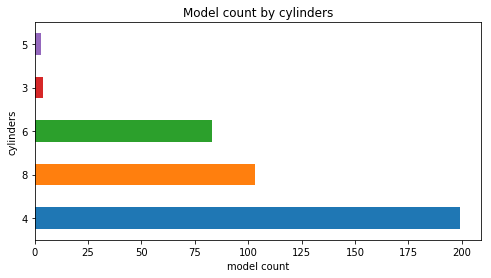

In [17]:
# Exercise 4.1.1 Plot number of cars by cylinders

ax=df.cylinders.value_counts().\
   plot.barh(figsize=(8,4), title="Model count by cylinders");
# figsize--->the size of the bar graph//// barh,or bar
# set labels
ax.set(ylabel="cylinders", xlabel="model count");

# note: ";" to suppress unwanted output



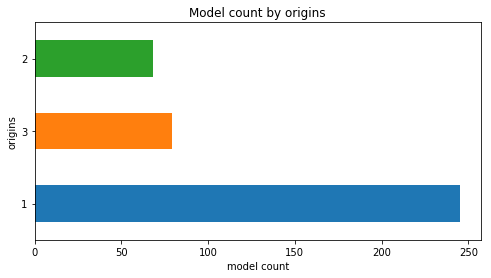

In [19]:
# Exercise 4.1.2: create a bar chart to count models per origin
bx=df.origin.value_counts().plot.barh(figsize=(8,4), title="Model count by origins");
bx.set(ylabel="origins", xlabel="model count");

In [23]:
# Exercise 4.1.2. Use seaborn to generate attractive plot

# count cars by year
count_by_year=df.model_year.value_counts()
count_by_year #values of year become the index,the nusing reset
count_by_year=df.model_year.value_counts().reset_index()
count_by_year.columns=["year", "model_count"]
count_by_year

73    40
78    36
76    34
82    30
75    30
79    29
70    29
81    28
77    28
72    28
80    27
71    27
74    26
Name: model_year, dtype: int64

,year,model_count
0,73,40
1,78,36
2,76,34
3,82,30
4,75,30
5,79,29
6,70,29
7,81,28
8,77,28
9,72,28


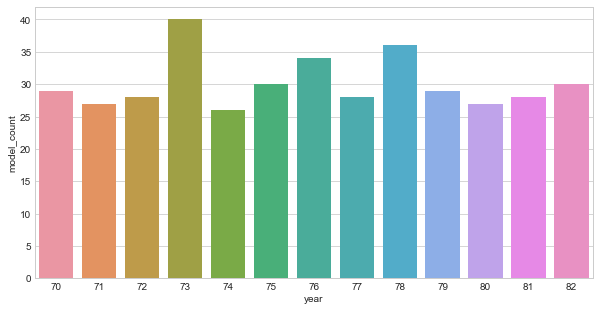

In [24]:
# set style
sns.set_style("whitegrid");

plt.figure(figsize=(10,5));
sns.barplot(x='year',y='model_count', data=count_by_year);
plt.show();   


### 4.2. Line chart

In [25]:
df.groupby('model_year')["mpg","acceleration"].mean()

,mpg,acceleration
model_year,,
70,17.689655,12.948276
71,21.111111,15.000000
72,18.714286,15.125000
73,17.100000,14.312500
74,22.769231,16.173077
75,20.266667,16.050000
76,21.573529,15.941176
77,23.375000,15.435714
78,24.061111,15.805556


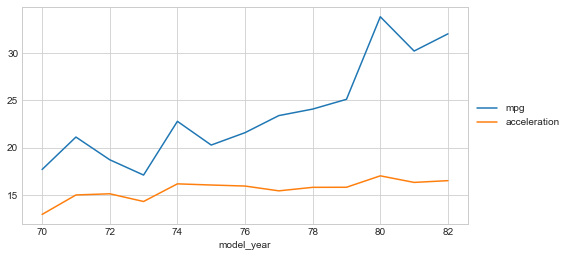

In [26]:
# Exercise 4.2.1. line chart

# How does mpg/weight change over time?

# show the relationship between 
# average mpg/weight and model year

df.groupby('model_year')["mpg","acceleration"].mean()\
.plot(kind='line', figsize=(8,4))\
.legend(loc='center left', bbox_to_anchor=(1, 0.5));  # set legend

# what finding can be seen here?

### 4.3 Stacked barchart

In [27]:
# Exercise 4.3.1. What kind of cars are popular over the years?

# cross tabulation between model_year and cylinders
ctab=pd.crosstab(index=df.model_year, columns=df.cylinders)
ctab

# normalize by row, i.e. get percentage of each model in a year
ctab=ctab.apply(lambda row: row/sum(row), axis=1)

# reorder column sequence by its popularity
ctab=ctab[[4,8,6,3,5]]
ctab

cylinders,3,4,5,6,8
model_year,,,,,
70,0,7,0,4,18
71,0,12,0,8,7
72,1,14,0,0,13
73,1,11,0,8,20
74,0,15,0,6,5
75,0,12,0,12,6
76,0,15,0,10,9
77,1,14,0,5,8
78,0,17,1,12,6


cylinders,4,8,6,3,5
model_year,,,,,
70,0.241379,0.620690,0.137931,0.000000,0.000000
71,0.444444,0.259259,0.296296,0.000000,0.000000
72,0.500000,0.464286,0.000000,0.035714,0.000000
73,0.275000,0.500000,0.200000,0.025000,0.000000
74,0.576923,0.192308,0.230769,0.000000,0.000000
75,0.400000,0.200000,0.400000,0.000000,0.000000
76,0.441176,0.264706,0.294118,0.000000,0.000000
77,0.500000,0.285714,0.178571,0.035714,0.000000
78,0.472222,0.166667,0.333333,0.000000,0.027778


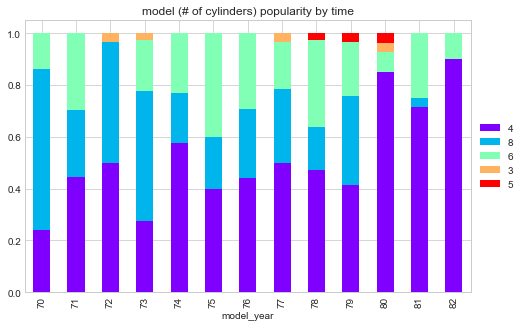

In [28]:
# Exercise 4.3.2 Stacked bar chart

ctab.plot(kind='bar', stacked=True, colormap='rainbow', \
   figsize=(8,5), title="model (# of cylinders) popularity by time").\
   legend(loc='center left', bbox_to_anchor=(1, 0.5));
    
# what insights can be found from this chart?

### 4.4 Histogram : learn distribution of varilables

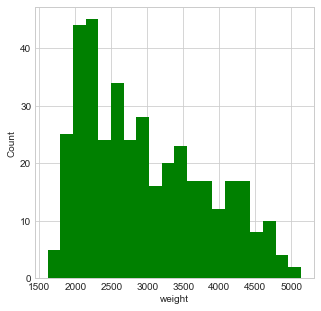

In [44]:
# Exercise 4.4.1. Histogram

# plot histgram using matlibplot
plt.figure(figsize=(5, 5));
plt.hist(df['weight'], color='g', bins=20); 
#plt.hist(df['weight'], color='g', bins=200); 
plt.xlabel("weight");
plt.ylabel("Count");

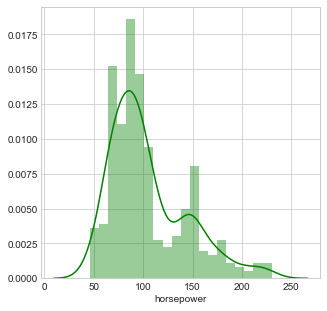

In [30]:
# Exercise 4.4.2. plot histogram and PDF using seaborn

sns.set_style("whitegrid")
plt.figure(figsize=(5, 5))
sns.distplot(df["horsepower"], color='g', bins=20);

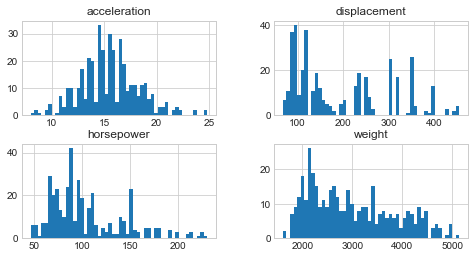

In [31]:
# Exercise 4.4.3. plot multiple histogram plots using pandas plot

df[['horsepower', 'weight','acceleration','displacement']]\
.hist(figsize=(8, 4), bins=50);

### 4.5. Scatterplot: show interaction between variables
- Pairwise scatter plot: discover interaction between any pair of variables
- Check variable correlation using pd.corr()

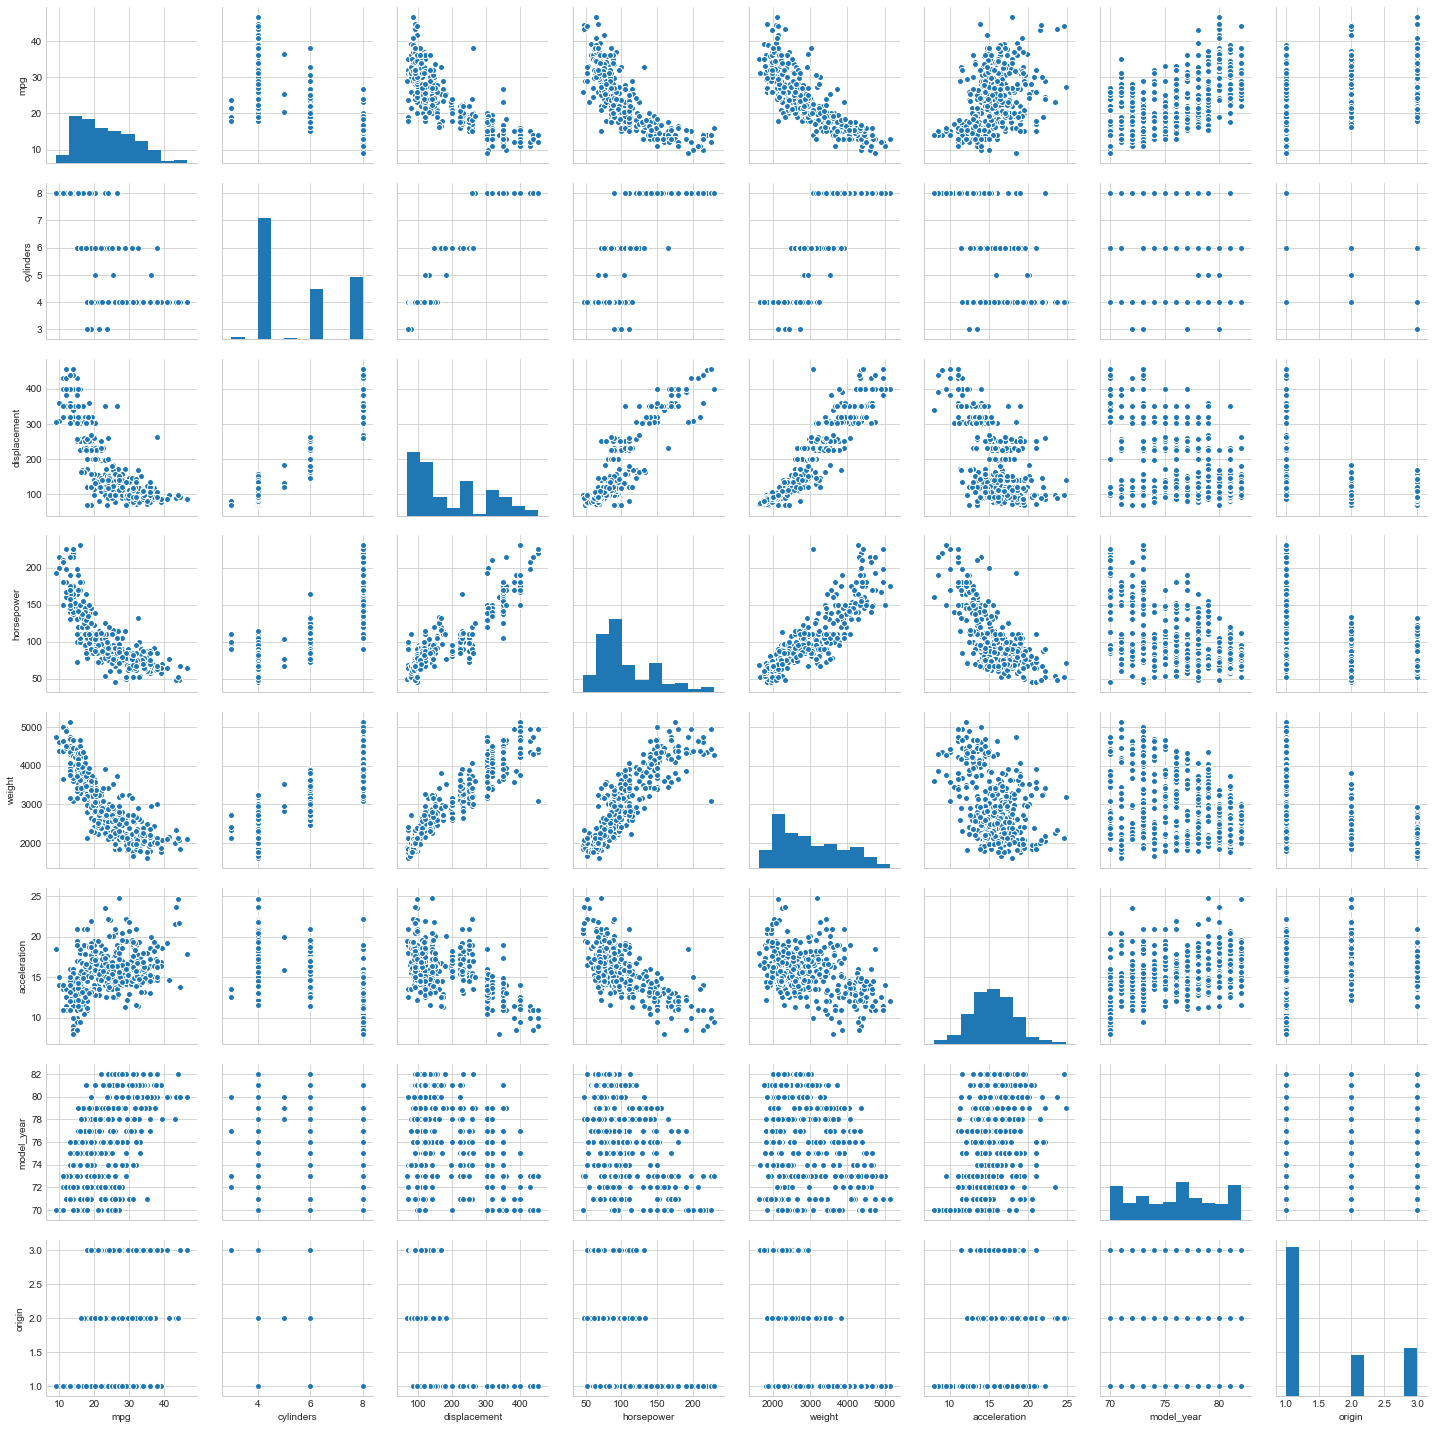

In [32]:
# Exercise 4.5.1. Pairwise scatterplot

sns.pairplot(data=df);
# x-axis is mpg(the first figure), and the y-axi is count
# mpg, weight, displacement, ... 
# seem to be highly correlated

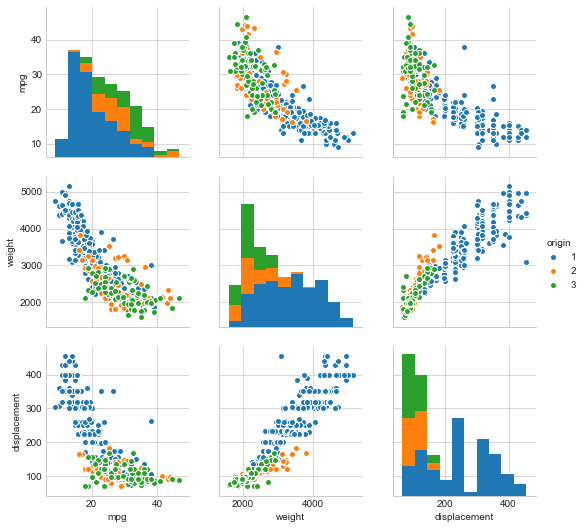

In [33]:
# Exercise 4.5.2. pairwise scatterplot with selected columns

# select variables for x and y axis
# color the points by origin (hue)

sns.pairplot(data=df, x_vars=['mpg', 'weight', 'displacement'],\
             y_vars=['mpg', 'weight', 'displacement'], \
             hue="origin");

# anything interesting can be found here?
# how about mpg/weight/displacement by origin?


In [35]:
# Exercise 4.5.3. Variable correlation
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


### 4.6. FacetGrid: Show variable relationship by facet

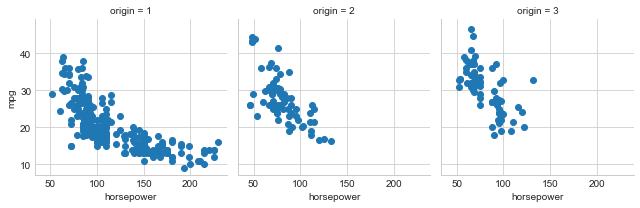

In [36]:
# Exercise 4.6.1.: How is horsepower and mpg correlated
#                 for cars from different origin? 

# Generate grid by origin
g = sns.FacetGrid(df, col="origin") ;
g
# plot a scatterplot between hrsepower and mpg 
# for each facet in the grid
g.map(plt.scatter, "horsepower", "mpg") ;

# what insights can be found from this facet plot?


### 4.7 Heatmap

In [37]:
# Exercise 4.7.1 Heatmap

# how did mpg change by time in different rigions?

# create cross tab
ctab=pd.crosstab(index=df.model_year,columns=df.origin,\
                 values=df.mpg, aggfunc=np.mean)
ctab
# sort year in decending order
ctab.sort_index(ascending=False, inplace=True)



origin,1,2,3
model_year,,,
70,15.272727,25.2000,25.500000
71,17.736842,28.7500,29.500000
72,16.277778,22.0000,24.200000
73,15.034483,24.0000,20.000000
74,18.142857,27.0000,29.333333
75,17.550000,24.5000,27.500000
76,19.431818,24.2500,28.000000
77,20.722222,29.2500,27.416667
78,21.772727,24.9500,29.687500


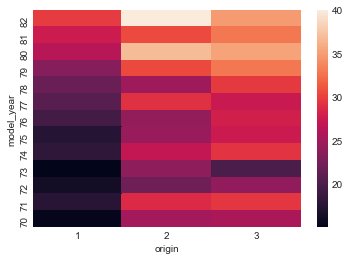

In [38]:
sns.heatmap(ctab);

# what conclusion can you get from the heat map?

## 5. Regression
- For details, see http://www.statsmodels.org/dev/example_formulas.html
- For categorical variables, you can use R style formulas
- Model interpretation: http://connor-johnson.com/2014/02/18/linear-regression-with-python/

In [39]:
# Exercise 5.1.  OLS(ordinary least squares) regression 

# linear regression between mpg and other factors

import statsmodels.api as sm

model = sm.OLS(df.mpg, df[['cylinders', 'displacement','horsepower',\
                           'weight','acceleration']]).fit();

# Print out the statistics
model.summary()


K:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     1419.
Date:                Thu, 27 Sep 2018   Prob (F-statistic):          2.47e-246
Time:                        16:06:20   Log-Likelihood:                -1232.9
No. Observations:                 392   AIC:                             2476.
Df Residuals:                     387   BIC:                             2496.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders        2.3883      0.503      4.747      0.000       1.399       3.377
displacement    -0.0623      0.011     -5.618      0.000      -0.084      -0.041
horsepower       0.1400      0.017      8.229      0.000       0.107       0.174
weight          -0.0067      0.001     -6.151      0.000      -0.009      -0.005
acceleration     1.7616      0.095     18.448      0.000       1.574       1.949
==============================================================================
Omnibus:                        8.863   Durbin-Watson:                   0.993
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               11.564
Skew:                           0.205   Prob(JB):                      0.00308
Kurtosis:                       3.735   Cond. No.                     5.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
# Exercise 5.2.

import statsmodels.formula.api as smf

model = smf.ols(formula='mpg ~ cylinders+ \
displacement+ horsepower+ weight \
+ acceleration+ C(origin)', data=df).fit();

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     141.7
Date:                Thu, 27 Sep 2018   Prob (F-statistic):          2.78e-102
Time:                        16:06:20   Log-Likelihood:                -1111.1
No. Observations:                 392   AIC:                             2238.
Df Residuals:                     384   BIC:                             2270.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         44.7688      2.640     16.959      0.000      39.578      49.959
C(origin)[T.2]     1.1255      0.702      1.604      0.109      -0.254       2.505
C(origin)[T.3]     2.9325      0.696      4.216      0.000       1.565       4.300
cylinders         -0.5662      0.404     -1.401      0.162      -1.361       0.229
displacement       0.0114      0.010      1.194      0.233      -0.007       0.030
horsepower        -0.0613      0.017     -3.636      0.000      -0.094      -0.028
weight            -0.0048      0.001     -5.948      0.000      -0.006      -0.003
acceleration      -0.0320      0.123     -0.259      0.795      -0.274       0.210
==============================================================================
Omnibus:                       34.295   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.569
Skew:                           0.635   Prob(JB):                     4.68e-11
Kurtosis:                       4.140   Cond. No.                     3.91e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""